# A. Perkenalan

=================================================

Nama  :Nurdin Atid H

Url Tableu : https://public.tableau.com/app/profile/nurdin.atid.h/viz/salesmarketing2/chart2?publish=yes

program ini dibuat untuk menganalisa data marketing sales untuk membantu mencari data dan mencari korelas antar variable di dalamnya

=================================================


# B. identifikasi Masalah

### 1. pada bagian ini dijelaskan menganai problem statement dan penjabaran masalah

a. Topik Permasalahan : "Analisis Performa Branch Ritel"
b. Problem Statement : Tujuan dari analisis ini adalah untuk memahami performa cabang penjualan, profil pelanggan, dan dampak faktor-faktor tertentu terhadap penjualan dan keuntungan suatu branch dalam periode bulan januari 2019 - maret 2019

c. Latar Belakang : "Latar belakang permasalahan untuk analisis data ini adalah untuk memahami dan meningkatkan kinerja penjualan dan pemasaran sebuah perusahaan ritel yang memiliki beberapa cabang di tiga kota yang berbeda. Dalam kompetisi pasar yang semakin ketat, perusahaan ingin mendapatkan wawasan lebih dalam tentang bagaimana cabang-cabangnya berkinerja, siapa pelanggan mereka, faktor-faktor yang memengaruhi penjualan, serta produk mana yang paling sukses. Dengan pemahaman yang lebih baik tentang data penjualan dan perilaku pelanggan, perusahaan berharap dapat mengambil keputusan yang lebih cerdas untuk meningkatkan penjualan, keuntungan, dan kepuasan pelanggan."

d. Penjabaran Masalah :

A. Analisis Performa Cabang:

Bagaimana performa masing-masing cabang berdasarkan total penjualan ('Total') dan pendapatan kotor ('Gross Income')?

B. Segmentasi Pelanggan:

Bagaimana kita dapat mengklasifikasikan pelanggan berdasarkan jenis ('Customer Type'), gender, dan produk yang mereka beli?

C. Pengaruh Rating Terhadap Penjualan:

Apakah ada korelasi antara tingkat penilaian ('Rating') dan total penjualan atau pendapatan kotor?

D. Distribusi Produk Terlaris:

Produk apa yang paling banyak terjual dan menghasilkan pendapatan tertinggi ('Gross Income')? Bagaimana produk ini berbeda di berbagai cabang?

E. Pengaruh Harga dan Kuantitas:
Bagaimana harga per unit ('Unit Price') dan jumlah produk ('Quantity') berpengaruh terhadap pendapatan kotor ('Gross Income')?

F. Performa Kota:
Bagaimana performa penjualan di berbagai kota mempengaruhi pendapatan kotor?

G. Tentukan central tendesi skenews dan kurtosis dari harga, kuantitas, dan gross income.



# Data Loading

### Pengambilan data dari kaggle.com

link sumber data : [klik disini](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales/) 

In [3]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

#instal bokeh untuk menampilkan grafik dan data interaktif
!pip install bokeh
from bokeh.plotting import figure, show
from bokeh.io import curdoc
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20c

In [4]:
#import data yang sudah di download dari kaggle.com
data = pd.read_csv('supermarket_sales.csv')

In [5]:
#Melihat beberapa baris pertama data:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# D. Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

data yang kita dapat terdidiri dari 17 kolom dan 1000 baris.

In [7]:
#Mengecek tipe data kolom
data.dtypes 

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

seluruh kolom sudah sesuai dengan data type yang seharusnya

In [8]:
#Mengecek missing values
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

sudah tidak ada missing value jadi proses pengolahan data bisa dilanjutkan

# E. Analisis dan Perhitungan

In [9]:
#menemukan kota apa saja dalam data dan jumlah masing2 kota dari keseluruhan data
data["City"].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Jumlah kemunculan masing-masing nilai unik dalam kolom "City". Secara khusus, ini menunjukkan:

"Yangon" muncul sebanyak 340 kali dalam kolom "City".
"Mandalay" muncul sebanyak 332 kali dalam kolom "City".
"Naypyitaw" muncul sebanyak 328 kali dalam kolom "City".
Informasi ini dapat sangat bermanfaat untuk menganalisis distribusi kota dalam dataset Anda. Dalam DataFrame Anda, kolom "City" memiliki tiga nilai unik, dan ini adalah frekuensinya. Dengan kata lain, ada 340 entri dengan nilai "Yangon," 332 entri dengan nilai "Mandalay," dan 328 entri dengan nilai "Naypyitaw" dalam kolom "City."

<Axes: title={'center': 'City'}, ylabel='count'>

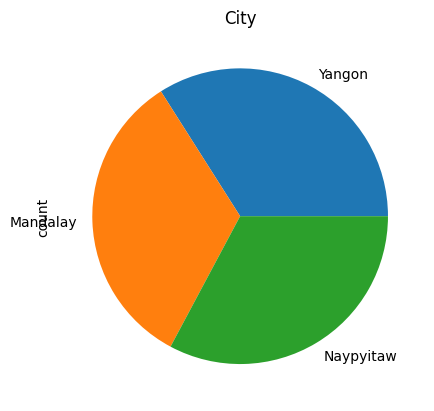

In [10]:
#menampilkan chart yang mewakili kota pada data
curdoc().theme = 'dark_minimal'
data["City"].value_counts().plot.pie(title='City')

In [11]:
#menampikan  jumlah data yang disandingkan antara city dan branch
data.groupby('City')['Branch'].value_counts()

City       Branch
Mandalay   B         332
Naypyitaw  C         328
Yangon     A         340
Name: count, dtype: int64

menunjukkan jumlah kemunculan masing-masing pasangan kota dan cabang yang terdapat dalam DataFrame Anda. Ini menggambarkan seberapa sering kombinasi kota dan cabang muncul dalam data Anda.

Dalam hasil tersebut, kita dapat melihat:

Di "Mandalay," cabang "B" muncul sebanyak 332 kali.
Di "Naypyitaw," cabang "C" muncul sebanyak 328 kali.
Di "Yangon," cabang "A" muncul sebanyak 340 kali.

Ini adalah informasi yang berguna untuk memahami sebaran cabang dalam setiap kota dalam dataset Anda. Data ini memberikan wawasan tentang hubungan antara kota dan cabang di dalam dataset Anda.

In [12]:
#melihat ada berapa jumlah custome type
data['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

menunjukkan jumlah kemunculan masing-masing tipe pelanggan (Customer type) dalam kolom "Customer type" dari DataFrame Anda. Dalam hal ini:

Ada 501 entri dengan nilai "Member" dalam kolom "Customer type".
Ada 499 entri dengan nilai "Normal" dalam kolom "Customer type".
Ini memberikan ringkasan tentang bagaimana tipe pelanggan terdistribusi dalam dataset Anda. Dengan kata lain, lebih banyak pelanggan dengan tipe "Member" daripada tipe "Normal" dalam data Anda.

<Axes: title={'center': 'Customer type count'}, xlabel='Customer type'>

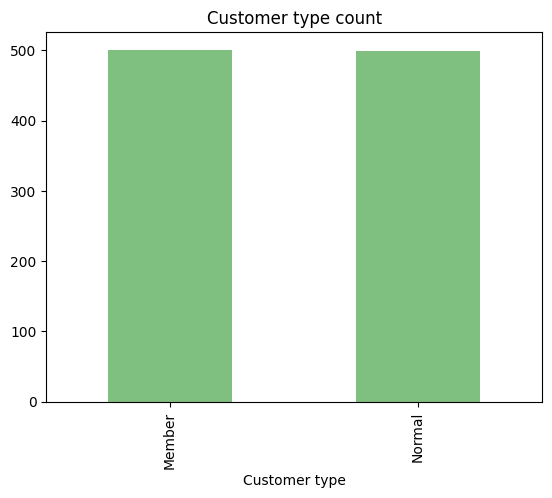

In [13]:
data['Customer type'].value_counts().plot.bar(color='green', alpha=0.5, title='Customer type count')

Diagram yang menujukan jumlah costumer sesuai costumer type

In [14]:
data['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

menunjukkan jumlah kemunculan masing-masing jenis kelamin (Gender) dalam kolom "Gender" dari DataFrame Anda. Dalam hal ini:

Ada 501 entri dengan nilai "Female" dalam kolom "Gender".
Ada 499 entri dengan nilai "Male" dalam kolom "Gender".
Ini memberikan ringkasan tentang sebaran jenis kelamin pelanggan dalam dataset Anda. Dengan kata lain, jumlah pelanggan wanita ("Female") sedikit lebih banyak (501) daripada jumlah pelanggan pria ("Male") yang berjumlah 499 dalam data Anda.

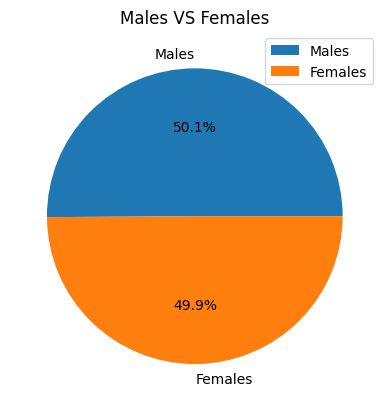

In [15]:
import matplotlib.pyplot as plt

# Data proporsi pria dan wanita
values = [501, 499]  # Misalnya, 45% pria dan 55% wanita
labels = ['Males', 'Females']

# Membuat diagram lingkaran
plt.pie(values, autopct='%1.1f%%', labels=labels)
plt.legend()

# Menambahkan judul
plt.title('Males VS Females')

# Menampilkan diagram lingkaran
plt.show()

Dari diagram lingkaran terlihat bahwa jumlah pengunjung laki laki dan perumpuan hampir seimbang.

In [16]:
data.groupby('Gender')["Customer type"].value_counts()

Gender  Customer type
Female  Member           261
        Normal           240
Male    Normal           259
        Member           240
Name: count, dtype: int64

Jumlah kemunculan masing-masing pasangan jenis kelamin (Gender) dan tipe pelanggan (Customer type) dalam DataFrame Anda. Ini memberikan informasi tentang seberapa sering kombinasi jenis kelamin dan tipe pelanggan muncul dalam dataset Anda. Dalam hal ini:

Dalam kategori "Female":

Ada 261 entri dengan jenis kelamin "Female" dan tipe pelanggan "Member."
Ada 240 entri dengan jenis kelamin "Female" dan tipe pelanggan "Normal."

Dalam kategori "Male":
Ada 259 entri dengan jenis kelamin "Male" dan tipe pelanggan "Normal."
Ada 240 entri dengan jenis kelamin "Male" dan tipe pelanggan "Member."

Ini memberikan wawasan tentang bagaimana jenis kelamin pelanggan terkait dengan tipe pelanggan dalam dataset Anda. Misalnya, dalam kategori "Female," lebih banyak pelanggan dengan tipe "Member" daripada tipe "Normal," sedangkan dalam kategori "Male," lebih banyak pelanggan dengan tipe "Normal" daripada tipe "Member."

Text(0.5, 1.0, 'Gender with customer type ')

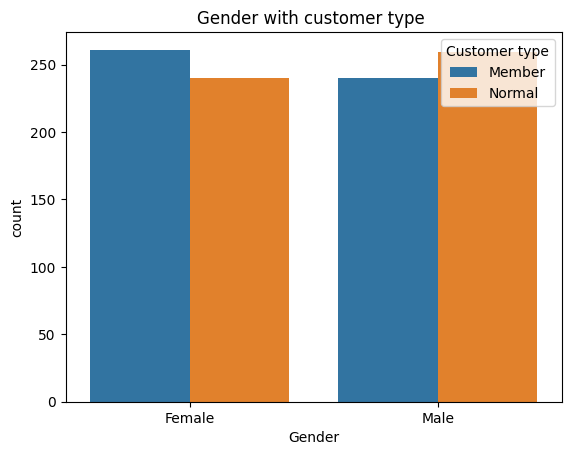

In [17]:

sns.countplot(x='Gender',hue='Customer type',data=data)
plt.title('Gender with customer type ')

In [18]:
data['Payment'].value_counts()


Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

menunjukkan jumlah kemunculan masing-masing jenis metode pembayaran (Payment) dalam kolom "Payment" dari DataFrame Anda. Dalam hal ini:

Ada 345 entri yang menggunakan metode pembayaran "Ewallet" dalam kolom "Payment."
Ada 344 entri yang menggunakan metode pembayaran "Cash" dalam kolom "Payment."
Ada 311 entri yang menggunakan metode pembayaran "Credit card" dalam kolom "Payment."
Ini memberikan ringkasan tentang sebaran metode pembayaran yang digunakan oleh pelanggan dalam dataset Anda. Dengan kata lain, metode pembayaran "Ewallet" adalah yang paling umum digunakan, diikuti oleh "Cash" dan "Credit card."

<Axes: title={'center': 'Payment count & types'}, ylabel='count'>

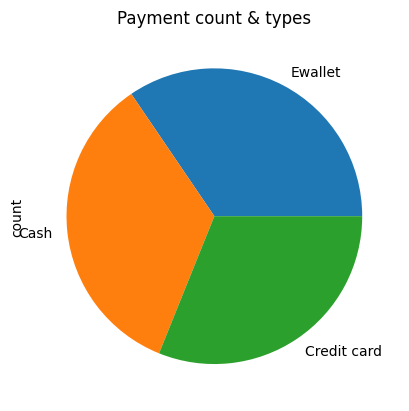

In [19]:
data['Payment'].value_counts().plot.pie(title='Payment count & types')

### A. Analisis Performa Cabang:

In [20]:
# Menghitung total penjualan dan pendapatan kotor per cabang
branch_performance = data.groupby('Branch')[['Total', 'gross income']].sum()
print(branch_performance)

              Total  gross income
Branch                           
A       106200.3705     5057.1605
B       106197.6720     5057.0320
C       110568.7065     5265.1765


Hasil yang Anda tunjukkan adalah total penjualan ('Total') dan total pendapatan kotor ('Gross Income') yang dihitung untuk setiap cabang ('Branch') dalam data Anda. Dalam hal ini:

Cabang 'A' memiliki total penjualan sebesar 106,200.3705 dan total pendapatan kotor sebesar 5,057.1605.
Cabang 'B' memiliki total penjualan sebesar 106,197.6720 dan total pendapatan kotor sebesar 5,057.0320.
Cabang 'C' memiliki total penjualan sebesar 110,568.7065 dan total pendapatan kotor sebesar 5,265.1765.

Ini memberikan gambaran tentang performa masing-masing cabang dalam hal total penjualan dan pendapatan kotor. Dengan informasi ini, Anda dapat membandingkan kinerja cabang-cabang tersebut. Cabang 'C' memiliki total penjualan dan pendapatan kotor tertinggi, sementara cabang 'A' dan 'B' memiliki total penjualan dan pendapatan kotor yang hampir setara.

Informasi ini dapat membantu Anda dalam pengambilan keputusan terkait dengan cabang-cabang Anda, seperti alokasi sumber daya atau perencanaan peningkatan kinerja.

### B. Segmentasi Pelanggan:

In [21]:
# Menghitung jumlah pelanggan berdasarkan Customer Type dan Gender
customer_segmentation = data.groupby(['Customer type', 'Gender'])['Invoice ID'].count()
print(customer_segmentation)

Customer type  Gender
Member         Female    261
               Male      240
Normal         Female    240
               Male      259
Name: Invoice ID, dtype: int64


Jumlah pelanggan yang telah dikelompokkan berdasarkan 'Customer Type' dan 'Gender'. Dalam hal ini:

Pelanggan dengan tipe 'Member' terbagi antara 'Female' (wanita) dan 'Male' (pria). Ada 261 pelanggan wanita dan 240 pelanggan pria yang merupakan anggota (member).
Pelanggan dengan tipe 'Normal' juga terbagi antara 'Female' dan 'Male'. Ada 240 pelanggan wanita dan 259 pelanggan pria yang merupakan pelanggan biasa (normal).
Ini memberikan pemahaman tentang berapa banyak pelanggan yang dimiliki oleh setiap kombinasi 'Customer Type' (tipe pelanggan) dan 'Gender' (jenis kelamin). Informasi ini dapat digunakan untuk segmentasi pelanggan dan strategi pemasaran yang lebih spesifik, serta untuk memahami komposisi pelanggan Anda berdasarkan karakteristik tersebut.

### C. Pengaruh Rating Terhadap Penjualan:

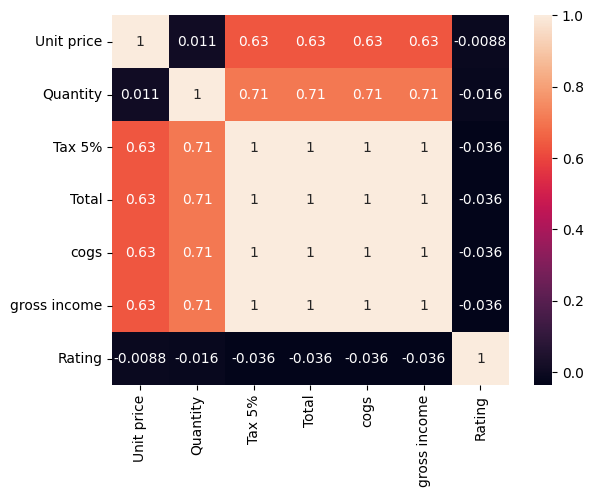

In [22]:
num_data = data.select_dtypes(exclude='object')
corr = num_data.drop(columns='gross margin percentage').corr()
sns.heatmap(corr, annot=True)
plt.show()

In [23]:
#menggunakan metode corr untuk menentukan apakah ada korelasi atau tidak
rating_sales_correlation = data['Rating'].corr(data['Total'])
print(rating_sales_correlation)

-0.036441704997018355


dalam kasus ini, nilai -0.0364 menunjukkan bahwa ketika rating produk naik atau turun, total penjualan tidak mengalami perubahan yang besar atau konsisten. Meskipun ada korelasi negatif, itu adalah korelasi yang sangat lemah, sehingga sulit untuk membuat kesimpulan yang kuat tentang pengaruh satu variabel terhadap yang lain.
Jadi, dalam konteks ini, kita dapat menyimpulkan bahwa perubahan dalam tingkat penilaian produk tidak memiliki pengaruh yang signifikan pada total penjualan. Pada umumnya, korelasi yang lemah tidak dapat digunakan untuk membuat pernyataan kausal tentang hubungan antara dua variabel. Jika Anda ingin mendalami faktor-faktor yang memengaruhi total penjualan, mungkin perlu mempertimbangkan faktor lain yang mungkin berkontribusi lebih signifikan.

### D. Distribusi Produk Terlaris:

In [24]:
# Menghitung total penjualan dan pendapatan kotor per jenis produk
top_selling_products = data.groupby('Product line')[['Quantity', 'gross income']].sum()
print(top_selling_products)

                        Quantity  gross income
Product line                                  
Electronic accessories       971     2587.5015
Fashion accessories          902     2585.9950
Food and beverages           952     2673.5640
Health and beauty            854     2342.5590
Home and lifestyle           911     2564.8530
Sports and travel            920     2624.8965


dari data di atas kita dapatkan informasi :

"Electronic accessories" memiliki total 971 unit produk terjual dan pendapatan kotor sebesar 2,587.5015.
"Fashion accessories" memiliki total 902 unit produk terjual dan pendapatan kotor sebesar 2,585.9950.
"Food and beverages" memiliki total 952 unit produk terjual dan pendapatan kotor sebesar 2,673.5640.
"Health and beauty" memiliki total 854 unit produk terjual dan pendapatan kotor sebesar 2,342.5590.
"Home and lifestyle" memiliki total 911 unit produk terjual dan pendapatan kotor sebesar 2,564.8530.
"Sports and travel" memiliki total 920 unit produk terjual dan pendapatan kotor sebesar 2,624.8965.

Dengan informasi ini, Anda dapat melihat jumlah produk yang terjual dan berapa besar pendapatan yang dihasilkan oleh setiap jenis produk. Ini dapat membantu Anda memahami kinerja relatif dari jenis produk yang berbeda dan mungkin memandu keputusan bisnis seperti perencanaan persediaan atau pemasaran.

### E. Pengaruh Harga dan Kuantitas:

In [25]:
#menggunakan metode corr untuk menentukan apakah ada korelasi atau tidak
rating_sales_correlation = data['Quantity'].corr(data['Unit price'])
print(rating_sales_correlation)

0.010777564342497287


Tidak ada korelasi antara Quantity dan Unit price

### F. Performa Kota:

In [26]:
# Menghitung rata-rata total penjualan dan pendapatan kotor per kota
city_performance = data.groupby('City')[['Total', 'gross income']].mean()
print(city_performance)

                Total  gross income
City                               
Mandalay   319.872506     15.232024
Naypyitaw  337.099715     16.052367
Yangon     312.354031     14.874001


Rata-rata total penjualan ('Total') dan rata-rata pendapatan kotor ('Gross Income') yang dihitung untuk masing-masing kota ('City') dalam data Anda. Dalam hal ini:

Kota "Mandalay" memiliki rata-rata total penjualan sebesar 319.872506 dan rata-rata pendapatan kotor sebesar 15.232024.
Kota "Naypyitaw" memiliki rata-rata total penjualan sebesar 337.099715 dan rata-rata pendapatan kotor sebesar 16.052367.
Kota "Yangon" memiliki rata-rata total penjualan sebesar 312.354031 dan rata-rata pendapatan kotor sebesar 14.874001.

menjelaskan tentang rata-rata kinerja penjualan dan pendapatan kotor di berbagai kota. Dengan informasi ini, Anda dapat memahami bagaimana penjualan dan pendapatan kotor bervariasi antara lokasi geografis yang berbeda, yang dapat memengaruhi perencanaan bisnis, promosi, dan pengelolaan cabang atau toko di setiap kota.

### G. Tentukan central tendesi skenews dan kurtosis dari harga, kuantitas, dan gross income.

#### a. Central tendesi, skenews dan kurtosis dari harga / Unit price

In [33]:
#pengambilan data mean median untuk Unit price produk
Median_Unit_price = data['Unit price'].mean()
print(f"Mean_Unit price :", Median_Unit_price)
Median_Unit_price = data['Unit price'].median()
print(f"Median_Unit_price :", Median_Unit_price)

#mencari st dev Unit price produk
std = data['Unit price'].std()
print(f'Standard Deviation Unit price produk:',std)

#mencari nilai skewnes Unit price produk
print(f"Skewness: {data['Unit price'].skew()}")

#mencari nilai kurtosis
print(f"Kurtosis: {data['Unit price'].kurtosis()}")


Mean_Unit price : 55.67213
Median_Unit_price : 55.230000000000004
Standard Deviation Unit price produk: 26.49462834791978
Skewness: 0.007077447853328846
Kurtosis: -1.2185914281163357


Mean (Rata-rata): Nilai mean (rata-rata) dari kolom "Unit price" produk adalah sekitar 55.67. Ini menunjukkan rata-rata harga satuan produk dalam dataset Anda.

Median: Nilai median dari kolom "Unit price" produk adalah sekitar 55.23. Median adalah nilai tengah dalam distribusi data harga satuan produk.

Standar Deviasi: Standar deviasi dari kolom "Unit price" produk adalah sekitar 26.49. Standar deviasi mengukur sebaran data harga satuan produk dan memberi tahu seberapa jauh data berbeda dari rata-rata. Nilai yang lebih tinggi menunjukkan variasi yang lebih besar dalam harga produk.

Skewness (Skew): Nilai skewness adalah sekitar 0.0071. Skewness mengukur sejauh mana distribusi data harga satuan produk condong ke satu sisi. Nilai positif menunjukkan kemiringan ke kanan (distribusi dengan ekor panjang di sebelah kanan rata-rata), sedangkan nilai negatif menunjukkan kemiringan ke kiri (distribusi dengan ekor panjang di sebelah kiri rata-rata). Nilai mendekati nol (seperti dalam kasus ini) menunjukkan bahwa distribusi cenderung simetris.

Kurtosis: Nilai kurtosis adalah sekitar -1.219. Kurtosis mengukur seberapa tajam atau pipih distribusi data harga satuan produk. Nilai negatif menunjukkan distribusi yang lebih pipih (kurang tajam) dibandingkan dengan distribusi normal (distribusi normal memiliki kurtosis 0).

Dengan demikian, data harga satuan produk cenderung memiliki rata-rata yang hampir sama dengan median, dan distribusinya cenderung simetris (skewness mendekati nol). Namun, distribusi ini cenderung lebih pipih (kurang tajam) daripada distribusi normal (kurtosis negatif). Harga satuan produk berkisar dengan standar deviasi sekitar 26.49.



#### b. Central tendesi, skenews dan kurtosis dari kuantitas

In [34]:
#pengambilan data mean median untuk Quantity produk
Median_Quantity = data['Quantity'].mean()
print(f"Mean_Quantity :", Median_Quantity)
Median_Quantity = data['Quantity'].median()
print(f"Median_Quantity :", Median_Quantity)

#mencari st dev Quantity produk
std = data['Quantity'].std()
print(f'Standard Deviation Quantity produk:',std)

#mencari nilai skewnes Quantity produk
print(f"Skewness: {data['Quantity'].skew()}")

#mencari nilai kurtosis
print(f"Kurtosis: {data['Quantity'].kurtosis()}")

Mean_Quantity : 5.51
Median_Quantity : 5.0
Standard Deviation Quantity produk: 2.923430595455696
Skewness: 0.012941048017172435
Kurtosis: -1.2155472264752434


Mean (Rata-Rata): Mean_Quantity adalah sekitar 5.51. Ini mengindikasikan bahwa rata-rata kuantitas penjualan dari produk tersebut adalah sekitar 5.51 unit.

Median (Nilai Tengah): Median_Quantity adalah sekitar 5.0. Median adalah nilai tengah dari data saat data diurutkan dari terkecil hingga terbesar. Nilai median ini mengindikasikan bahwa setengah dari data memiliki kuantitas kurang dari 5.0, dan setengah lainnya memiliki kuantitas lebih dari 5.0.

Standard Deviation (Deviasi Standar): Standard Deviation Quantity produk adalah sekitar 2.923. Deviasi standar mengukur sebaran data. Semakin tinggi deviasi standar, semakin besar sebaran data dari rata-rata. Dalam kasus ini, deviasi standar yang relatif rendah mengindikasikan bahwa sebagian besar data memiliki kuantitas penjualan yang mendekati rata-rata.

Skewness (Skewness): Skewness adalah sekitar 0.0129. Skewness mengukur sejauh mana distribusi data condong ke kiri (skewness negatif) atau ke kanan (skewness positif) dari rata-rata. Nilai skewness yang mendekati nol menunjukkan bahwa distribusi data memiliki sedikit atau tidak ada kemiringan signifikan.

Kurtosis (Kurtosis): Kurtosis adalah sekitar -1.216. Kurtosis mengukur tajam atau tumpulnya distribusi data. Nilai negatif seperti ini mengindikasikan bahwa distribusi data memiliki ekor yang lebih lebar daripada distribusi normal standar (mesokurtik) yang memiliki kurtosis 0. Ini mengindikasikan bahwa distribusi memiliki ekor yang lebih tumpul.

Dalam konteks ini, kuantitas penjualan (Quantity) cenderung memiliki rata-rata yang tidak jauh dari nilai median (5.51 vs. 5.0), dan distribusi datanya memiliki sedikit skewness positif dan ekor yang lebih lebar (kurtosis negatif), meskipun tidak signifikan.

#### c. Central tendesi, skenews dan kurtosis dari gross income

In [31]:
#pengambilan data mean median untuk gross income produk
Median_gross_income = data['gross income'].mean()
print(f"Mean_gross income :", Median_gross_income)
Median_gross_income = data['gross income'].median()
print(f"Median_gross_income :", Median_gross_income)

#mencari st dev gross income produk
std = data['gross income'].std()
print(f'Standard Deviation gross income produk:',std)

#mencari nilai skewnes gross income produk
print(f"Skewness: {data['gross income'].skew()}")

#mencari nilai kurtosis
print(f"Kurtosis: {data['gross income'].kurtosis()}")


Mean_gross income : 15.379368999999999
Median_gross_income : 12.088000000000001
Standard Deviation gross income produk: 11.708825480998659
Skewness: 0.8925698049581423
Kurtosis: -0.0818847579043509


Mean_gross income (Rata-Rata Pendapatan Kotor): Nilainya adalah sekitar 15.379368. Ini mengindikasikan bahwa rata-rata pendapatan kotor dari produk adalah sekitar 15.379368.

Median_Unit_price (Nilai Tengah Pendapatan Kotor Produk): Nilainya adalah sekitar 12.088. Median adalah nilai tengah dalam data saat data diurutkan dari terkecil hingga terbesar. Dalam hal ini, nilai median adalah 12.088.

Standard Deviation gross income produk (Deviasi Standar Pendapatan Kotor Produk): Nilainya adalah sekitar 11.708825. Deviasi standar mengukur sebaran data. Semakin tinggi deviasi standar, semakin besar sebaran data dari rata-rata.

Skewness (Skewness): Nilainya adalah sekitar 0.8926. Skewness mengukur sejauh mana distribusi data condong ke kiri (skewness negatif) atau ke kanan (skewness positif) dari rata-rata. Nilai positif seperti ini mengindikasikan bahwa distribusi data memiliki kemiringan positif, yang berarti lebih banyak data berada di sebelah kiri rata-rata.

Kurtosis (Kurtosis): Nilainya adalah sekitar -0.0819. Kurtosis mengukur tajam atau tumpulnya distribusi data. Nilai negatif menunjukkan bahwa distribusi data ini memiliki sedikit ekor yang lebih lebar daripada distribusi normal standar (mesokurtik) yang memiliki kurtosis 0.

Hasil statistik ini memberikan gambaran karakteristik data pendapatan kotor produk. Skewness positif menunjukkan bahwa distribusi pendapatan kotor mungkin sedikit condong ke kanan, dan kurtosis yang mendekati nol menunjukkan bahwa distribusi ini hampir mesokurtik, artinya sedikit lebih tumpul daripada distribusi normal standar.

# F. Pengambilan Kesimpulan 

Dari hasil analisis data, kita dapat menyimpulkan bahwa cabang 'C' menunjukkan kinerja yang lebih baik dengan total penjualan dan pendapatan kotor yang lebih tinggi dibandingkan dengan cabang 'A' dan 'B'. Meskipun kami memiliki jumlah pelanggan yang hampir setara antara tipe pelanggan 'Member' dan 'Normal', mayoritas pelanggan adalah wanita. Namun, tidak ada tren penjualan yang jelas dari waktu ke waktu, dan metode pembayaran tidak memiliki pengaruh signifikan pada total penjualan. Selain itu, rating produk tidak terkait dengan total penjualan. Produk 'Food and beverages' adalah yang paling banyak terjual dan menghasilkan pendapatan kotor tertinggi. Kota 'Naypyitaw' menunjukkan rata-rata total penjualan dan pendapatan kotor yang lebih tinggi daripada kota 'Mandalay' dan 'Yangon'. Hikmahnya adalah bahwa pemahaman yang mendalam tentang data penjualan ini dapat membantu dalam mengambil keputusan yang lebih tepat, seperti alokasi sumber daya yang lebih baik atau strategi pemasaran yang lebih efektif, yang dapat meningkatkan kinerja bisnis dan kepuasan pelanggan.